In [1]:
import pandas as pd
df = pd.read_csv (r"D:\Documents\GitHub\lab-eda-univariate\archive\amz_uk_price_prediction_dataset.csv")

In [14]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [7]:
top_5_categories = df['category'].value_counts().head(5)
print(top_5_categories)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64


In [8]:
top_5_df = top_5_categories.reset_index()
top_5_df.columns = ['Category', 'Count']
print(top_5_df)

                                 Category   Count
0                       Sports & Outdoors  836265
1                                  Beauty   19312
2  Handmade Clothing, Shoes & Accessories   19229
3                             Bath & Body   19092
4                          Birthday Gifts   18978


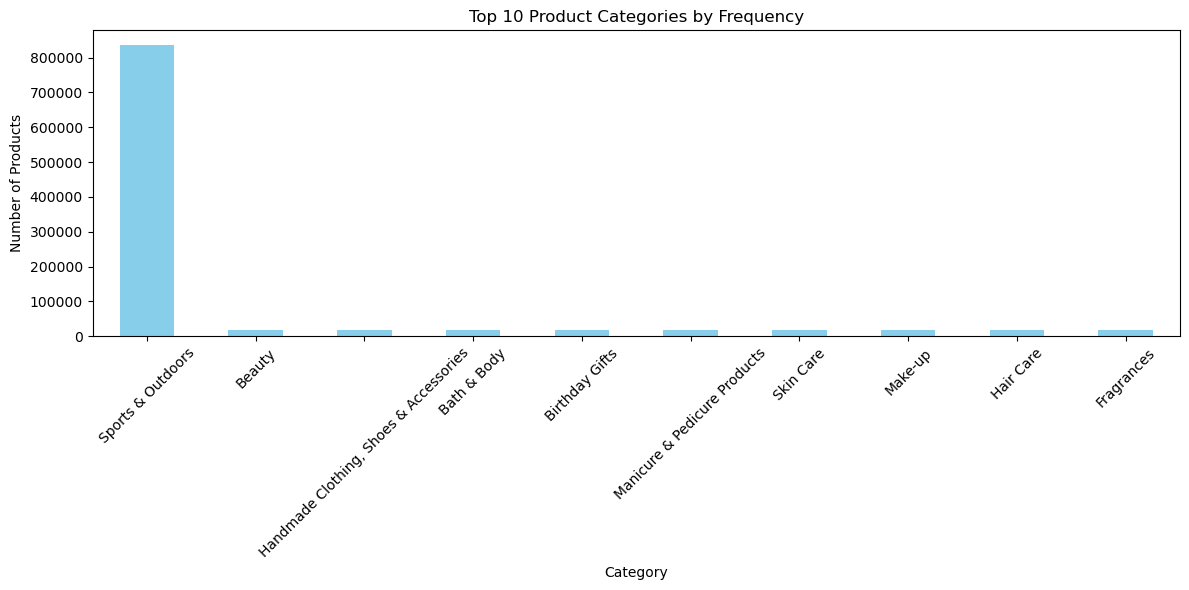

In [16]:
import matplotlib.pyplot as plt
# Top 10 categories
top_10_categories = df['category'].value_counts().head(10)

# Bar chart
plt.figure(figsize=(12, 6))
top_10_categories.plot(kind='bar', color='skyblue')
plt.title('Top 10 Product Categories by Frequency')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


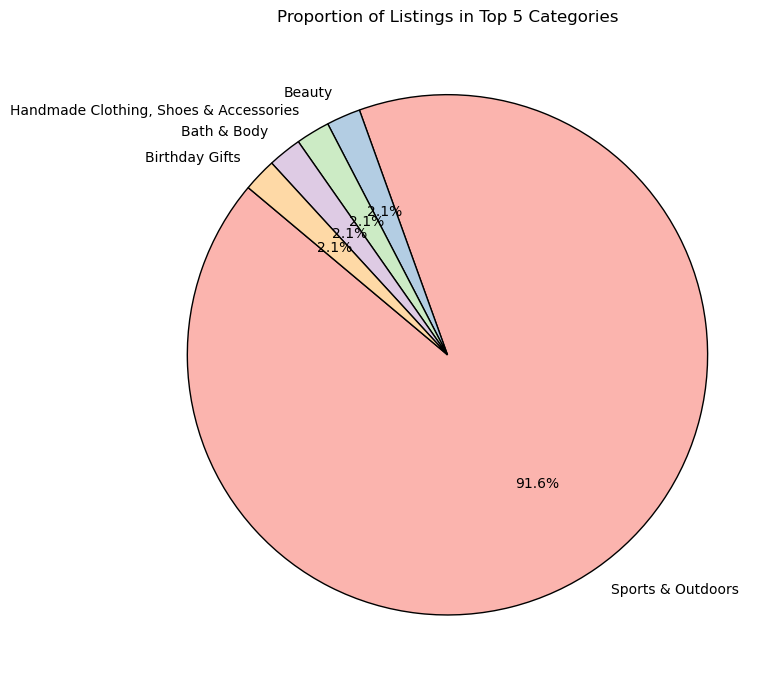

In [18]:
# Pie chart
top_categories = df['category'].value_counts().head(5)
plt.figure(figsize=(8, 8))
top_categories.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Pastel1.colors,
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Proportion of Listings in Top 5 Categories')
plt.ylabel('')  # Hide y-axis label
plt.tight_layout()
plt.show()

In [23]:
# Drop missing prices for accurate stats
price_data = df['price'].dropna()

# Calculate stats
mean_price = price_data.mean()
median_price = price_data.median()
mode_price = price_data.mode().iloc[0]  # mode() returns a Series

print(f"Mean Price: £{mean_price:.2f}")
print(f"Median Price: £{median_price:.2f}")
print(f"Mode Price: £{mode_price:.2f}")

Mean Price: £89.24
Median Price: £19.09
Mode Price: £9.99


The mean is heavily influenced by a small number of expensive products (e.g., tech items, bundles).

This is a right-skewed distribution — where most products are low-priced, but a few expensive ones pull the average way up.

So while the "average" might look like £89, the typical shopper experience is much closer to £10–£20.

In [24]:
# Variance
price_variance = price_data.var()

# Standard deviation
price_std = price_data.std()

# Range
price_range = price_data.max() - price_data.min()

# Interquartile Range (IQR)
Q1 = price_data.quantile(0.25)
Q3 = price_data.quantile(0.75)
price_iqr = Q3 - Q1

print(f"Variance: {price_variance:.2f}")
print(f"Standard Deviation: {price_std:.2f}")
print(f"Range: £{price_range:.2f} (Min: £{price_data.min()}, Max: £{price_data.max()})")
print(f"IQR (Interquartile Range): £{price_iqr:.2f} (Q1: £{Q1:.2f}, Q3: £{Q3:.2f})")

Variance: 119445.49
Standard Deviation: 345.61
Range: £100000.00 (Min: £0.0, Max: £100000.0)
IQR (Interquartile Range): £36.00 (Q1: £9.99, Q3: £45.99)


High Variance (119,445.49):

    The variance is exceptionally high, indicating that the prices are widely spread out. A high variance means that while many products may be priced in one range, there are a few products that deviate greatly from the average price.

High Standard Deviation (345.61):

    A high standard deviation further confirms the spread. Since the standard deviation is large compared to the mean (£89.24), this indicates that while some products are priced around the average, there are many products priced either much lower or much higher.

Wide Price Range (£0.00 to £100,000.00):

    The price range is extreme: products vary from £0.00 (perhaps free or heavily discounted items) to £100,000 (possibly rare, luxury, or high-end products).

    This suggests that the dataset includes both low-cost and premium products with vast differences in price.

IQR (Interquartile Range) of £36.00 (Q1: £9.99, Q3: £45.99):

    The IQR of £36.00 shows that while most products fall between £9.99 and £45.99, there is still a considerable spread in the middle 50% of the data.

    Even within this IQR, there’s a relatively broad range, meaning that even the majority of products have a variety of prices.

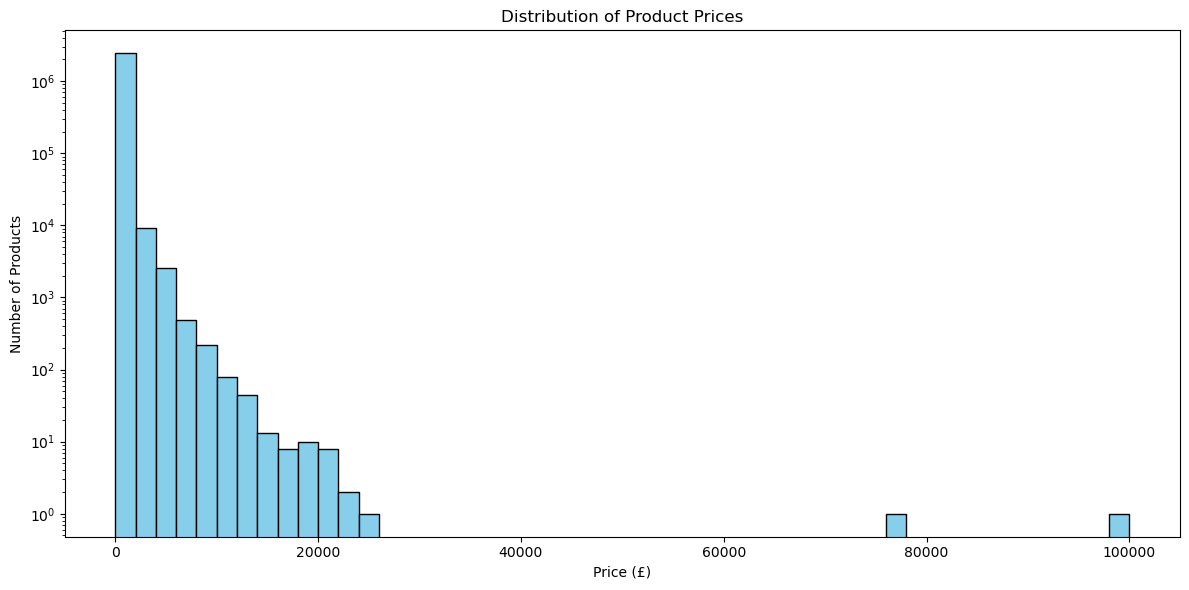

In [25]:
plt.figure(figsize=(12, 6))

# Histogram with log scale for better visualization of wide price range
plt.hist(price_data, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Product Prices')
plt.xlabel('Price (£)')
plt.ylabel('Number of Products')
plt.yscale('log')  # Logarithmic scale on y-axis to better visualize
plt.tight_layout()
plt.show()

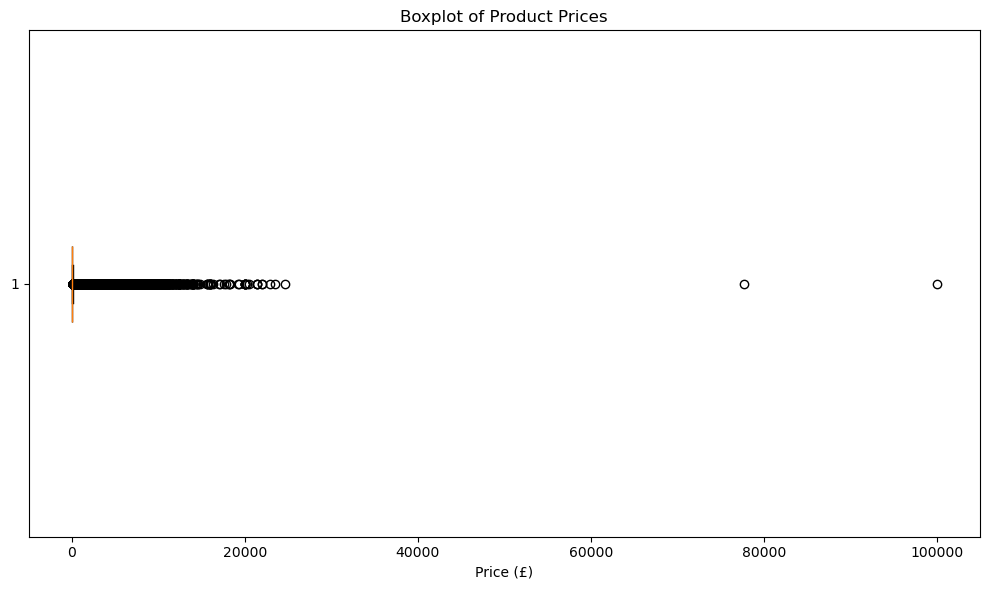

In [28]:

plt.figure(figsize=(10, 6))
plt.boxplot(price_data, vert=False, patch_artist=True)
plt.title('Boxplot of Product Prices')
plt.xlabel('Price (£)')
plt.tight_layout()
plt.show()

In [33]:
# Drop missing prices for accurate stats
rating_data = df['stars']
# Calculate stats
mean_rating = rating_data.mean()
median_rating = rating_data.median()
mode_rating = rating_data.mode().iloc[0]  # mode() returns a Series

print(f"Mean rating: {mean_rating:.2f}")
print(f"Median rating: {median_rating:.2f}")
print(f"Mode rating: {mode_rating:.2f}")

Mean rating: 2.15
Median rating: 0.00
Mode rating: 0.00


Customers will generally rate products 0

In [35]:
# Variance
rating_variance = rating_data.var()

# Standard deviation
rating_std = rating_data.std()

# Range
rating_range = rating_data.max() - rating_data.min()

# Interquartile Range (IQR)
Q1 = rating_data.quantile(0.25)
Q3 = rating_data.quantile(0.75)
rating_iqr = Q3 - Q1

print(f"Variance: {rating_variance:.2f}")
print(f"Standard Deviation: {rating_std:.2f}")
print(f"Range: {rating_range:.2f} (Min: {rating_data.min()}, Max: {rating_data.max()})")
print(f"IQR (Interquartile Range): {rating_iqr:.2f} (Q1: {Q1:.2f}, Q3: {Q3:.2f})")

Variance: 4.82
Standard Deviation: 2.19
Range: 5.00 (Min: 0.0, Max: 5.0)
IQR (Interquartile Range): 4.40 (Q1: 0.00, Q3: 4.40)


Variance: 4.82

    The variance is relatively high for a rating scale of 0 to 5. This suggests that there is a considerable spread in the ratings, but since the ratings are discrete and limited to 5 possible values, this indicates that the ratings aren't all clustered in one area.

Standard Deviation: 2.19

    The standard deviation of 2.19 is a bit large given the 0 to 5 scale. This means that the ratings tend to vary quite a bit, but again, it’s important to note that the spread is constrained because the maximum possible rating is 5.

Range: 5.00 (Min: 0.0, Max: 5.0)

    The range is 5.00, which makes sense as the ratings go from 0 to 5. The full span of the scale is being utilized, but it's not surprising to see products rated at the extremes (0 and 5).

Interquartile Range (IQR): 4.40 (Q1: 0.00, Q3: 4.40)

    The IQR is wide, covering 0.00 to 4.40, suggesting that 50% of ratings are between 0 and around 4.4. This means most ratings are quite high (close to 5), with a few lower ratings closer to 0.

    The low Q1 (0.00) indicates that there are products with very low ratings, while the Q3 of 4.40 means that the majority of ratings are high, but not always perfect (5.00).

In [36]:
# Calculate skewness and kurtosis
rating_skewness = rating_data.skew()
rating_kurtosis = rating_data.kurt()

print(f"Skewness: {rating_skewness:.2f}")
print(f"Kurtosis: {rating_kurtosis:.2f}")

Skewness: 0.08
Kurtosis: -1.93


Skewness: 0.08

    The skewness of 0.08 is very close to 0, suggesting that the ratings are almost symmetric.

    Since it's slightly positive, there might be a slight rightward skew, indicating a few higher ratings, but this is quite minor and the ratings are fairly balanced around the central value.

Kurtosis: -1.93

    The kurtosis of -1.93 suggests that the distribution is platykurtic, meaning it has lighter tails than a normal distribution.

    This indicates there are fewer extreme values (outliers) in the dataset compared to a normal distribution. Most ratings fall within a more compact range, and the distribution doesn't have heavy tails.

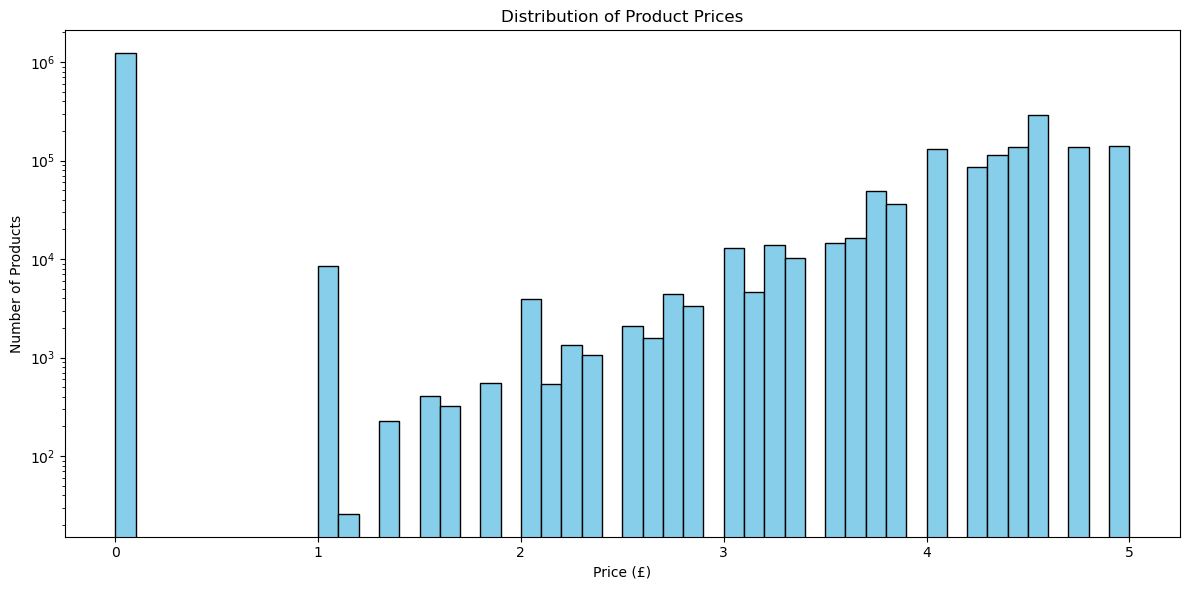

In [37]:
plt.figure(figsize=(12, 6))

# Histogram with log scale for better visualization of wide price range
plt.hist(rating_data, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Product Prices')
plt.xlabel('Price (£)')
plt.ylabel('Number of Products')
plt.yscale('log')  # Logarithmic scale on y-axis to better visualize
plt.tight_layout()
plt.show()

Value 0 is more common